In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Xarray reads the NETCDF lazily. Only when an operation is needed the values are loaded.
ds_read=xr.open_dataset('kappa_psi_dataset.nc')
print(ds_read)

<xarray.Dataset> Size: 4GB
Dimensions:  (times: 241734, z: 65, r: 65, shot: 1050)
Coordinates:
  * times    (times) float32 967kB 100.0 180.0 200.0 ... 5.266e+06 5.266e+06
  * shot     (shot) int32 4kB 160016 160067 160072 ... 194915 194959 194993
  * z        (z) float32 260B -1.6 -1.55 -1.5 -1.45 -1.4 ... 1.45 1.5 1.55 1.6
  * r        (r) float32 260B 0.84 0.8666 0.8931 0.9197 ... 2.487 2.513 2.54
Data variables:
    psirz    (times, z, r) float32 4GB ...
    kappa    (times) float32 967kB ...


### Plot a random time slice

In [3]:
time_slice=random.randint(0,len(ds_read['times']))
time_slice

236533

In [4]:
flux_surf= ds_read.isel(times=time_slice)

In [5]:
flux_surf

<xarray.Dataset> Size: 22kB
Dimensions:  (z: 65, r: 65, shot: 1050)
Coordinates:
    times    float32 4B 5.152e+06
  * shot     (shot) int32 4kB 160016 160067 160072 ... 194915 194959 194993
  * z        (z) float32 260B -1.6 -1.55 -1.5 -1.45 -1.4 ... 1.45 1.5 1.55 1.6
  * r        (r) float32 260B 0.84 0.8666 0.8931 0.9197 ... 2.487 2.513 2.54
Data variables:
    psirz    (z, r) float32 17kB ...
    kappa    float32 4B ...

(np.float64(0.8399999737739563),
 np.float64(2.5399999618530273),
 np.float64(-1.600000023841858),
 np.float64(1.600000023841858))

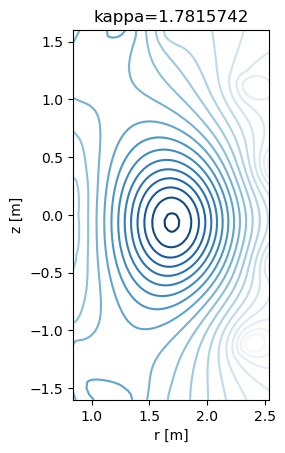

In [6]:
#xr.plot.pcolormesh(flux_surf['psirz']) 
cplot = flux_surf['psirz'].plot.contour(x=flux_surf['psirz'].dims[1] #so the x axis is R
                                        ,levels=40)
plt.title('kappa='+str(flux_surf['kappa'].values))
plt.axis('scaled')

### Kappa analysis

Text(0, 0.5, 'Num. time slices')

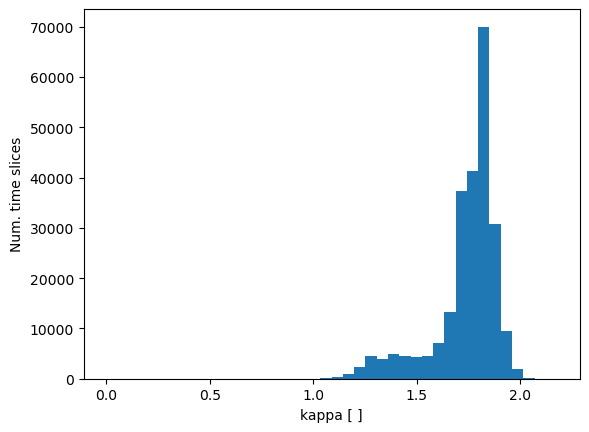

In [7]:
ds_read['kappa'].plot.hist(bins=40)
plt.ylabel('Num. time slices')

### SMALLER SET

In [9]:
#REducing the Dataset size for faster (and less memory) operations
ds_small=ds_read.isel(times=slice(0,10000))

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.210e+02,
        1.013e+03, 1.105e+03, 6.368e+03, 1.391e+03]),
 array([0.        , 0.20666555, 0.41333109, 0.61999667, 0.82666218,
        1.0333277 , 1.23999333, 1.44665885, 1.65332437, 1.85998988,
        2.0666554 ]),
 <BarContainer object of 10 artists>)

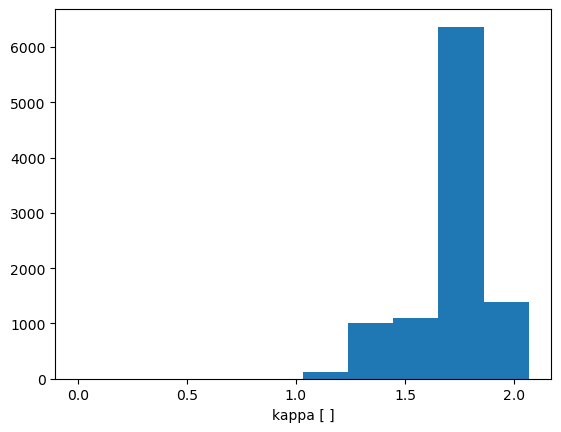

In [14]:
ds_small['kappa'].plot.hist()

In [10]:
ds_kappa_small=ds_small.where(ds_small['kappa']<1.2,drop=True)

(np.float64(0.8399999737739563),
 np.float64(2.5399999618530273),
 np.float64(-1.600000023841858),
 np.float64(1.600000023841858))

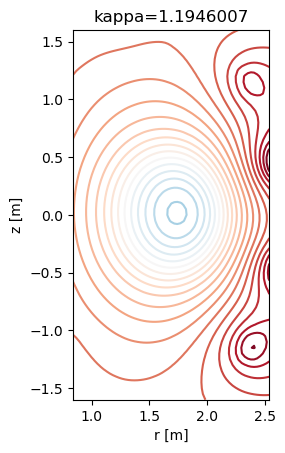

In [11]:
time_slice=random.randint(0,len(ds_kappa_small['times']))
flux_surf_small= ds_kappa_small.isel(times=time_slice)

cplot = flux_surf_small['psirz'].plot.contour(x=flux_surf_small['psirz'].dims[1] #so the x axis is R
                                        ,levels=40)
plt.title('kappa='+str(flux_surf_small['kappa'].values))
plt.axis('scaled')

In [12]:
ds_kappa_big=ds_small.where(ds_small['kappa']>1.9,drop=True)

(np.float64(0.8399999737739563),
 np.float64(2.5399999618530273),
 np.float64(-1.600000023841858),
 np.float64(1.600000023841858))

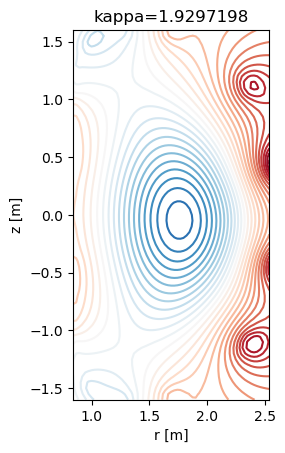

In [13]:
time_slice=random.randint(0,len(ds_kappa_big['times']))
flux_surf_big= ds_kappa_big.isel(times=time_slice)

cplot = flux_surf_big['psirz'].plot.contour(x=flux_surf_big['psirz'].dims[1] #so the x axis is R
                                        ,levels=40)
plt.title('kappa='+str(flux_surf_big['kappa'].values))
plt.axis('scaled')